In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Darwin Choy\Documents\Portfolio projects\venv\Scripts\python.exe -m pip install --upgrade pip


         person_age  person_income  person_emp_length     loan_amnt  \
count  32416.000000   3.241600e+04       32416.000000  32416.000000   
mean      27.747008   6.609164e+04           4.768880   9593.845632   
std        6.354100   6.201558e+04           4.090411   6322.730241   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.854200e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.921800e+04           7.000000  12250.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32416.000000  32416.000000         32416.000000   
mean       11.014662      0.218688             0.170250   
std         3.083050      0.413363             0.106812   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%   

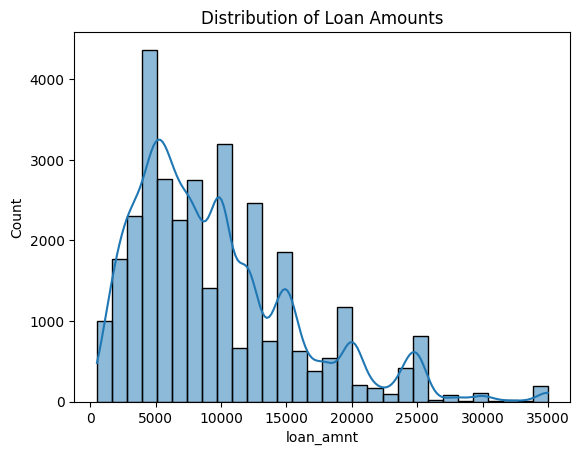

In [4]:
%store -r df_cleaned

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df_cleaned.describe())

# Distribution of loan amounts
sns.histplot(df_cleaned["loan_amnt"], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.show()



In [5]:
df_cleaned[['person_income']].sort_values(by='person_income', ascending=False).head(15)


,person_income
32297,6000000
30049,2039784
32546,1900000
32497,1782000
31924,1440000
31922,1362000
17833,1200000
29120,1200000
29119,1200000
17834,948000


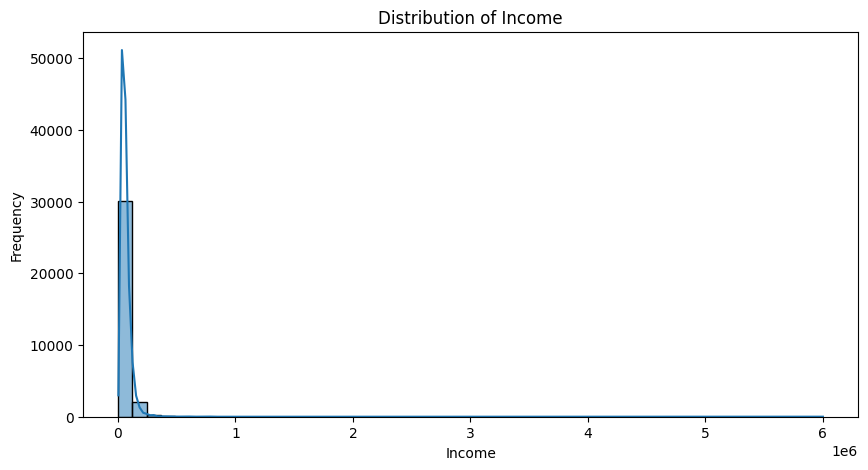

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['person_income'], bins=50, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()



In [7]:
upper_income = df_cleaned['person_income'].quantile(0.99)
df_cleaned[df_cleaned['person_income'] > upper_income]


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
15,23,500000,7.0,30000,10.65,0,0.06,3,False,False,...,False,False,False,True,False,False,False,False,False,False
33,25,306000,2.0,24250,13.85,0,0.08,3,False,False,...,False,False,False,False,True,False,False,False,False,False
34,26,300000,10.0,7800,13.49,0,0.03,4,False,False,...,True,False,False,False,True,False,False,False,False,False
42,26,300000,10.0,20000,7.88,0,0.07,4,False,False,...,False,False,True,False,False,False,False,False,False,False
43,23,300000,1.0,24250,19.41,0,0.08,2,False,True,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,63,1782000,13.0,12025,14.27,0,0.01,30,False,False,...,False,False,False,False,True,False,False,False,False,False
32543,52,720000,1.0,7925,8.94,0,0.01,30,False,False,...,False,True,False,False,False,False,False,False,False,False
32544,58,780000,7.0,4500,6.91,0,0.01,20,False,False,...,False,True,False,False,False,False,False,False,False,False
32546,60,1900000,5.0,1500,10.99,0,0.00,21,False,False,...,False,True,False,False,False,False,False,False,False,False


In [8]:
df_cleaned = df_cleaned[df_cleaned['person_income'] <= upper_income]

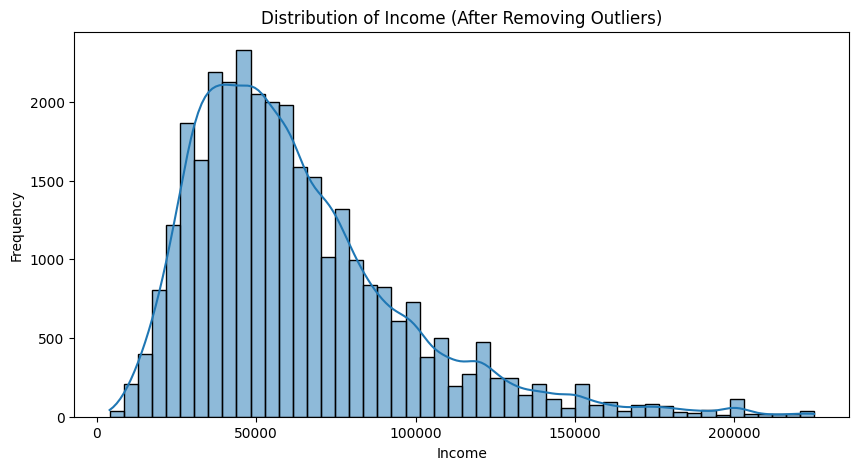

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['person_income'], bins=50, kde=True)
plt.title('Distribution of Income (After Removing Outliers)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Eliminar edades irreales (>100 años)
df_cleaned = df_cleaned[df_cleaned['person_age'] <= 100]

# Eliminar duraciones de empleo irreales (>50 años)
df_cleaned = df_cleaned[df_cleaned['person_emp_length'] <= 50]

In [11]:
print(df_cleaned.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32087.000000   32087.000000       32087.000000  32087.000000   
mean      27.678530   62723.122542           4.740393   9511.925390   
std        6.176796   34339.582736           3.965025   6227.695248   
min       20.000000    4000.000000           0.000000    500.000000   
25%       23.000000   38400.000000           2.000000   5000.000000   
50%       26.000000   55000.000000           4.000000   8000.000000   
75%       30.000000   78000.000000           7.000000  12000.000000   
max       94.000000  225000.000000          41.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32087.000000  32087.000000         32087.000000   
mean       11.006096      0.219684             0.171383   
std         3.080269      0.414039             0.106650   
min         5.420000      0.000000             0.010000   
25%         8.490000      0.000000             0.090000   
50%   

In [12]:
import pandas as pd

df_cleaned['age_group'] = pd.cut(df_cleaned['person_age'], bins=[20, 30, 40, 50, 60, 100], labels=['20s', '30s', '40s', '50s', '60+'])
df_cleaned['income_category'] = pd.qcut(df_cleaned['person_income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [13]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32087 entries, 1 to 32580
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   person_age                   32087 non-null  int64   
 1   person_income                32087 non-null  int64   
 2   person_emp_length            32087 non-null  float64 
 3   loan_amnt                    32087 non-null  int64   
 4   loan_int_rate                32087 non-null  float64 
 5   loan_status                  32087 non-null  int64   
 6   loan_percent_income          32087 non-null  float64 
 7   cb_person_cred_hist_length   32087 non-null  int64   
 8   person_home_ownership_OTHER  32087 non-null  bool    
 9   person_home_ownership_OWN    32087 non-null  bool    
 10  person_home_ownership_RENT   32087 non-null  bool    
 11  loan_intent_EDUCATION        32087 non-null  bool    
 12  loan_intent_HOMEIMPROVEMENT  32087 non-null  bool    
 13  loan_i

In [14]:
df_processed = df_cleaned.copy()

In [19]:
df_processed.head(25)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,age_group,income_category
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,True,False,False,False,False,False,False,20s,Low
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,False,False,True,False,False,False,False,False,20s,Low
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,True,False,False,False,False,False,20s,High
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,True,False,False,False,False,True,20s,Medium
5,21,9900,2.0,2500,7.14,1,0.25,2,False,True,...,True,False,False,False,False,False,False,False,20s,Low
6,26,77100,8.0,35000,12.42,1,0.45,3,False,False,...,False,True,False,False,False,False,False,False,20s,High
7,24,78956,5.0,35000,11.11,1,0.44,4,False,False,...,False,True,False,False,False,False,False,False,20s,Very High
8,24,83000,8.0,35000,8.90,1,0.42,2,False,False,...,False,False,False,False,False,False,False,False,20s,Very High
9,21,10000,6.0,1600,14.74,1,0.16,3,False,True,...,True,False,False,True,False,False,False,False,20s,Low
10,22,85000,6.0,35000,10.37,1,0.41,4,False,False,...,True,True,False,False,False,False,False,False,20s,Very High


In [16]:
%store df_processed

Stored 'df_processed' (DataFrame)


In [18]:
import os

# Get the current working directory (notebooks/)
current_dir = os.getcwd()

# Define the path to the 'data/' directory
data_dir = os.path.join(current_dir, '..', 'data')  # Going up one level to reach 'data/'

# Save the processed data
df_processed.to_csv(os.path.join(data_dir, "processed_data.csv"), index=False)
